# **Prediction using Supervised ML**

Predicting the percentage of marks of a student based on the number of study hours.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#Importing the dataset

marks= "http://bit.ly/w-data"
data= pd.read_csv(marks)
data.shape
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Relationship between Variables**

As seen below, we observe a liner relationship between the dependent and the independent

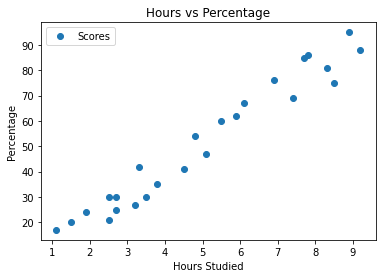

In [30]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

*This implies there's a positive trend in the data.*

Therefore, we can make use of Simple Linear Regressor, since a linear relationship is observed between the independent and dependent variables.

# **Coorelation**

Correlation is a statistic that measures the degree to which two variables move in relation to each other.
This measure is helpful in identifying how "correlated" a variable is with respect to the dependent variable, a.k.a, target variable.
Ranges from [-1,1].

Positive correlation specifies positive orientation of that variable with the target variable, and negative implies an inverse orientation. 0 indiactes there's no correlation with the target variable at all, and such variables has to be omitted from training.

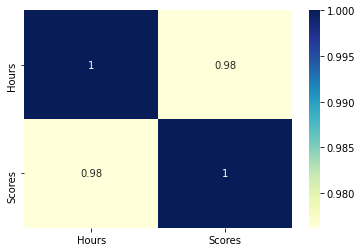

In [31]:
correlation= data.corr(method='pearson')
sns.heatmap(correlation, annot=True, cmap='YlGnBu'); #Plot of the correlation matrix

*As we can see, the variables have a high value of positive coorelation, which is in agreement with the plot which we saw earlier.*

In [32]:
# Splitting the dataset into dependent and independent variables

X = data.iloc[:, :-1].values
X =X.reshape(-1,1)
y = data.iloc[:, 1].values
y = y.reshape (-1,1)

In [33]:
# Splitting the dataset into training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Training the Model**

We need to implement linear regression models, import the LinearRegression class, instantiate it, and call the fit() method along with the training data.

In [34]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.intercept_)
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [35]:
#Reshaping 2-D Array to 1-D Array in order to put into DataFrame
y_test=y_test.reshape(5)
y_pred=y_pred.reshape(5)
print(y_test)
print(y_pred)

[20 27 69 30 62]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# **Evaluation**

Study the performance of the model.

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Regression Score:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
Regression Score: 0.9454906892105354


*As seen above, the **score** obtained for our model is about 94.5%, with small MAE, MSE and RMS error.*

# **Prediction**

Predicting for a new value which the model has not seen before.

In [37]:
hrs = 9.5
pred = regressor.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.5
Predicted Score = [96.16939661]


*As seen in the above example, if a student studies for about 9.5 hours, he/she can obtain about 96.2%*

# **Conclusion**

In this notebook, we have seen the implementation of a simple linear regression model, and have concluded that Linear regression is the best regression model for this dataset.